# **Escuela Politécnica Nacional**
## **[Tarea 07] Unidad 03-B | splines cúbicos**
### **Nombre:** Sebastián Morales
### **Fecha:** 01/06/2025
### **Curso:** GR1CC 

### **Repositorio:**
https://github.com/SebastianMoralesEpn/Github1.0/tree/cd930aeba96ea793ce693f90bbfb1f6033544f69/Tareas/%5BTarea%2006%5D%20Unidad%2003-A%20%20Serie%20de%20Taylor%20y%20Polinomios%20de%20Lagrange


**Conjunto de Ejercicios**

**3. Diríjase al pseudocódigo spline cubico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:**

In [1]:
import sympy as sp
from IPython.display import display

def spline_cubica(valores_x: list[float], valores_y: list[float]) -> list[sp.Expr]:
    """
    Interpolación cúbica por tramos. Cada par de puntos se conecta mediante un polinomio cúbico 
    de la forma: 
        P_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3

    Los valores de entrada no requieren estar ordenados ni ser equiespaciados.

    ## Parámetros
    - valores_x: coordenadas en x de los puntos
    - valores_y: coordenadas en y de los puntos

    ## Retorna
    - Lista de expresiones simbólicas que representan los polinomios cúbicos por tramos.
    """

    # Ordenar los puntos por sus coordenadas x
    puntos_ordenados = sorted(zip(valores_x, valores_y), key=lambda par: par[0])
    x_data = [p[0] for p in puntos_ordenados]
    y_data = [p[1] for p in puntos_ordenados]

    num_intervalos = len(x_data) - 1
    h_deltas = [x_data[i + 1] - x_data[i] for i in range(num_intervalos)]

    # Cálculo de la secuencia alpha
    alpha = [0] * num_intervalos
    for i in range(1, num_intervalos):
        alpha[i] = 3 / h_deltas[i] * (y_data[i + 1] - y_data[i]) - 3 / h_deltas[i - 1] * (y_data[i] - y_data[i - 1])

    # Inicialización de los arreglos l, u, z
    l = [1]
    u = [0]
    z = [0]

    for i in range(1, num_intervalos):
        l.append(2 * (x_data[i + 1] - x_data[i - 1]) - h_deltas[i - 1] * u[i - 1])
        u.append(h_deltas[i] / l[i])
        z.append((alpha[i] - h_deltas[i - 1] * z[i - 1]) / l[i])

    l.append(1)
    z.append(0)
    c_coef = [0] * (num_intervalos + 1)

    x = sp.Symbol("x")
    polinomios = []

    for j in range(num_intervalos - 1, -1, -1):
        c_coef[j] = z[j] - u[j] * c_coef[j + 1]
        b_coef = (y_data[j + 1] - y_data[j]) / h_deltas[j] - h_deltas[j] * (c_coef[j + 1] + 2 * c_coef[j]) / 3
        d_coef = (c_coef[j + 1] - c_coef[j]) / (3 * h_deltas[j])
        a_coef = y_data[j]

        print(f"Intervalo {j}: a={a_coef}, b={b_coef}, c={c_coef[j]}, d={d_coef}")

        polinomio = a_coef + b_coef * (x - x_data[j]) + c_coef[j] * (x - x_data[j])**2 + d_coef * (x - x_data[j])**3
        polinomios.append(polinomio)

    polinomios.reverse()
    return polinomios


**4. Usando la función anterior, encuentre el spline cubico para:**

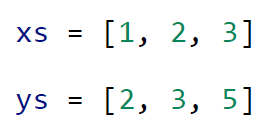

In [3]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = spline_cubica(valores_x=xs, valores_y=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

Intervalo 1: a=3, b=1.5, c=0.75, d=-0.25
Intervalo 0: a=2, b=0.75, c=0.0, d=0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

**5. Usando la función anterior, encuentre el spline cubico para:**

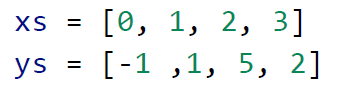

In [5]:
xs_1 = [0, 1, 2, 3]
ys_1 = [-1, 1, 5, 2]

splines_1 = spline_cubica(valores_x=xs_1, valores_y=ys_1)
_ = [display(s) for s in splines_1]
print("______")
_ = [display(s.expand()) for s in splines_1]

Intervalo 2: a=5, b=1.0, c=-6.0, d=2.0
Intervalo 1: a=1, b=4.0, c=3.0, d=-3.0
Intervalo 0: a=-1, b=1.0, c=0.0, d=1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

**6. Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla.**

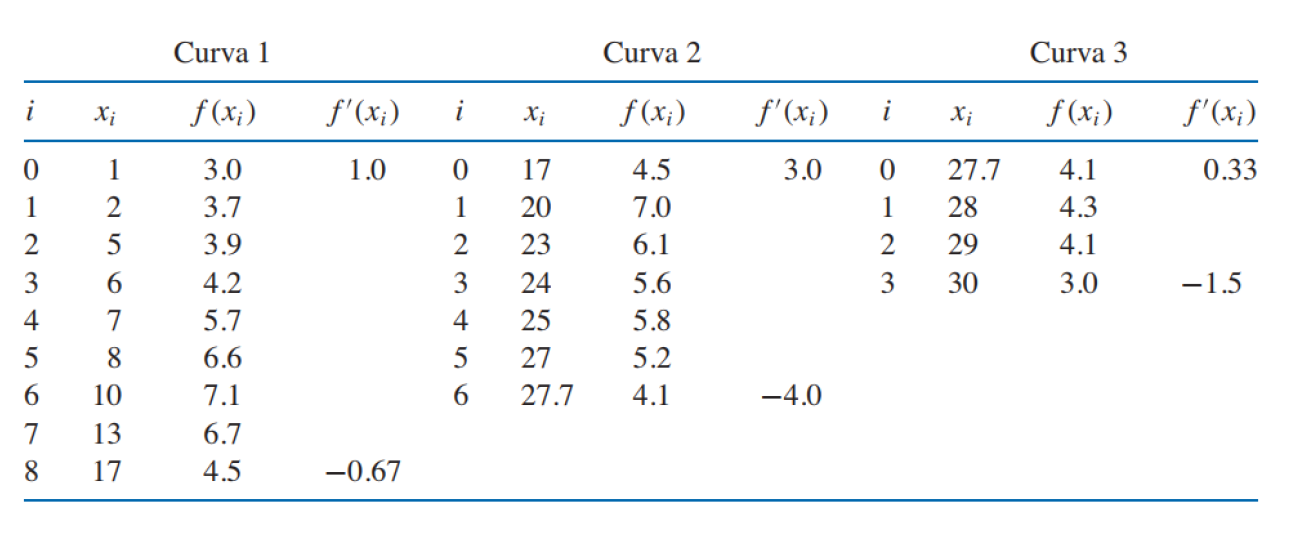

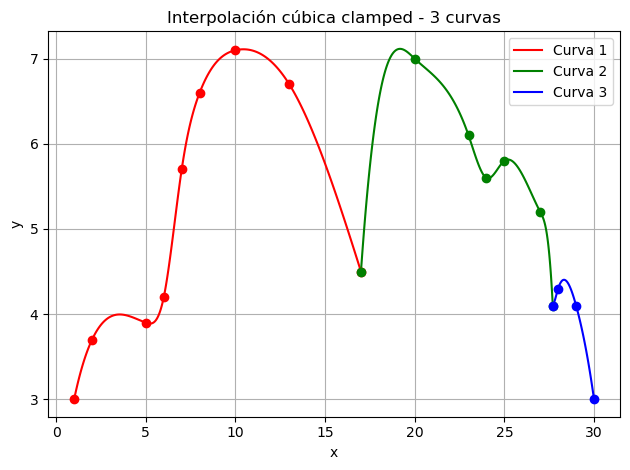

In [9]:
import sympy as sym
import matplotlib.pyplot as plt
import numpy as np
from sympy import pprint

# Función de interpolación cúbica clamped
def cubic_spline_clamped(xs: list[float], ys: list[float], B0: float, B1: float) -> tuple[list[sym.Symbol], list[float]]:
    points = sorted(zip(xs, ys), key=lambda x: x[0])
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]
    for i in range(1, n):
        l.append(2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1])
        u.append(h[i] / l[i])
        z.append((alpha[i] - h[i - 1] * z[i - 1]) / l[i])
    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])

    c = [0] * (n + 1)
    c[-1] = z[-1]
    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3
        splines.append(S)
    splines.reverse()
    return splines, xs

# ---------- Datos de las curvas ----------
x = sym.Symbol('x')

# Curva 1
xs1 = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys1 = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]
B01, B11 = 1.0, -0.67

# Curva 2
xs2 = [17, 20, 23, 24, 25, 27, 27.7]
ys2 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]
B02, B12 = 3.0, -4.0

# Curva 3
xs3 = [27.7, 28, 29, 30]
ys3 = [4.1, 4.3, 4.1, 3.0]
B03, B13 = 0.33, -1.5

# ---------- Interpolación ----------
spl1, xn1 = cubic_spline_clamped(xs1, ys1, B01, B11)
spl2, xn2 = cubic_spline_clamped(xs2, ys2, B02, B12)
spl3, xn3 = cubic_spline_clamped(xs3, ys3, B03, B13)

# ---------- Gráfica ----------
fig, ax = plt.subplots()

# Función para graficar una curva spline
def plot_spline(splines, nodes, color, label):
    for i, Si in enumerate(splines):
        Si_func = sym.lambdify(x, Si, 'numpy')
        x_vals = np.linspace(nodes[i], nodes[i+1], 100)
        y_vals = Si_func(x_vals)
        ax.plot(x_vals, y_vals, color=color, label=label if i == 0 else "")

plot_spline(spl1, xn1, 'red', 'Curva 1')
plot_spline(spl2, xn2, 'green', 'Curva 2')
plot_spline(spl3, xn3, 'blue', 'Curva 3')

# Graficar puntos originales
ax.plot(xs1, ys1, 'ro')
ax.plot(xs2, ys2, 'go')
ax.plot(xs3, ys3, 'bo')

ax.set_title("Interpolación cúbica clamped - 3 curvas")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid()
ax.legend()
plt.tight_layout()
